# Procesamiento y análisis de datos (EDA)

- **PASO 1: Definicion de problema:**
- Nuestro objetivo es lograr un modelo capaz de devolvernos un precio dependiento la zona o el tipo de alquiler que elija.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest

- **PASO 2: Recopilacion de datos**

In [2]:
df = pd.read_csv('/workspaces/GuilloMansa-MachineLearning/data/raw/internal-link.csv')
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


- **PASO 3: Analisis descriptivo**

In [3]:
df.shape, df.info

((48895, 16),
 <bound method DataFrame.info of              id                                               name   host_id  \
 0          2539                 Clean & quiet apt home by the park      2787   
 1          2595                              Skylit Midtown Castle      2845   
 2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
 3          3831                    Cozy Entire Floor of Brownstone      4869   
 4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
 ...         ...                                                ...       ...   
 48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
 48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
 48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
 48893  36485609               43rd St. Time Square-cozy single bed  30985759   
 48894  36487245  Trendy duplex in the very heart of Hell's Kit

In [4]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.000,9471945.000,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.000,7822033.000,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072900e+01,5.500000e-02,40.500,40.690,4.072300e+01,4.076300e+01,4.091300e+01
longitude,48895.0,-7.395200e+01,4.600000e-02,-74.244,-73.983,-7.395600e+01,-7.393600e+01,-7.371300e+01
price,48895.0,1.527210e+02,2.401540e+02,0.000,69.000,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.030000e+00,2.051100e+01,1.000,1.000,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327400e+01,4.455100e+01,0.000,1.000,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373000e+00,1.680000e+00,0.010,0.190,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.144000e+00,3.295300e+01,1.000,1.000,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127810e+02,1.316220e+02,0.000,0.000,4.500000e+01,2.270000e+02,3.650000e+02


In [5]:
price_stats = df['price'].describe().round(2)
price_stats

count    48895.00
mean       152.72
std        240.15
min          0.00
25%         69.00
50%        106.00
75%        175.00
max      10000.00
Name: price, dtype: float64

- **PASO 4: limpieza de datos**

- Eliminacion de duplicados, columnas con datos irrelevantes para nuestro objetivo y valores atipicos.
- En nuestro caso las columnas que eliminaremos luego de dar estudio son: 'id', 'host_id', 'name', 'last_review', 'calculted_host_listings_count', 'reviews_per_month'.

In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [7]:
df[df.duplicated(keep=False)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [8]:
df = df.drop_duplicates()

In [9]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Observaciones:**
> - Vemos que el dataset cuenta con 48895 filas por 16 columnas
> - No existen columnas duplicadas
> - Se detectan valores null en nuestras columnas 'last_review', 'reviews_per_month', 'name' y 'host_name'.
> - Vemos que respecto a los precios la media es de 152 usd, su desviacion estandar es de 240 y hay minimos de 69 usd y maximos de 10.000usd, pero tambien hay valores 0. Nos da idea de la dispersion y de que posiblemente hay valores erróneos o atípicos.
> - Columna minimun_nights contiene 1250 dias lo que dice que no sería muy factible un alquiler por dicha cantidad de dias.
> - En columna availability_365 hay valores cero, nos dice que estos no han estado disponibles por algo ningun dia del año.
> - En total, se contabilizaron 7 variables numericas y 9 categoricas.
> - Se destaca que algunas viviendas no tienen reviews.
> - En cuanto a la columna de propietarios calculated_host_listing_count la media es de 7 propiedades por persona, aunque vemos que hay algunos con muchos y otros con una.

- **PASO 5: analisis de variables**

- Consideramos que las columnas que contienen los datos del hospedaje ['name'], el id y el nombre del host ['host_id','host_name'] son datos que son irrelevantes para nuestro objetivo.
- Tomaremos para nuestro analisis todas las propiedades que esten disponibles, por lo cual aunque no tengan reseñas las analizaremos, no asi las que no tengan precio ni disponibilidad. Entonces la columna number_of_reviews no nos interesa tampoco.
- Continuando con el análisis, nos damos cuenta que la columna 'neighbourhood' tampoco nos hace falta, aunque también podríamos dejar afuera la columna 'neighbourhood_group' dado que tenemos las coordenadas de nuestros inmuebles pero la dejaremos para estudiar las zonas y tenerlas identificadas.
- A continuacion descartaremos los valores donde price sea cero y donde no hubo disponibilidad en el año.


In [10]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [11]:
num_distintos = df['neighbourhood'].nunique()
num_distintos_group = df['neighbourhood_group'].nunique()
num_distintos_room = df['room_type'].nunique()
num_distintos,num_distintos_group, num_distintos_room

(221, 5, 3)

In [12]:
df.drop(['id','name','host_id','host_name','last_review','calculated_host_listings_count','reviews_per_month','neighbourhood','number_of_reviews'],axis=1,inplace=True)

In [13]:
filas_cero = df[(df['price'] == 0) | (df['availability_365'] == 0)].index
df.drop(filas_cero, inplace=True)

In [14]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
latitude,31354.0,40.73,0.06,40.50,40.69,40.72,40.76,40.91
longitude,31354.0,-73.95,0.05,-74.24,-73.98,-73.95,-73.93,-73.71
price,31354.0,162.09,254.44,10.00,70.00,112.00,189.00,10000.00
minimum_nights,31354.0,8.34,23.84,1.00,2.00,3.00,5.00,1250.00
availability_365,31354.0,175.83,126.20,1.00,55.00,168.00,305.00,365.00


- **PASO 6: Ingenieria de caracteristicas y analisis de variables:**
> - Variables numericas: price, latitude, longitude, minimun_nights, availability_365
> - Variables categoricas: room_type, neighbourhood_group

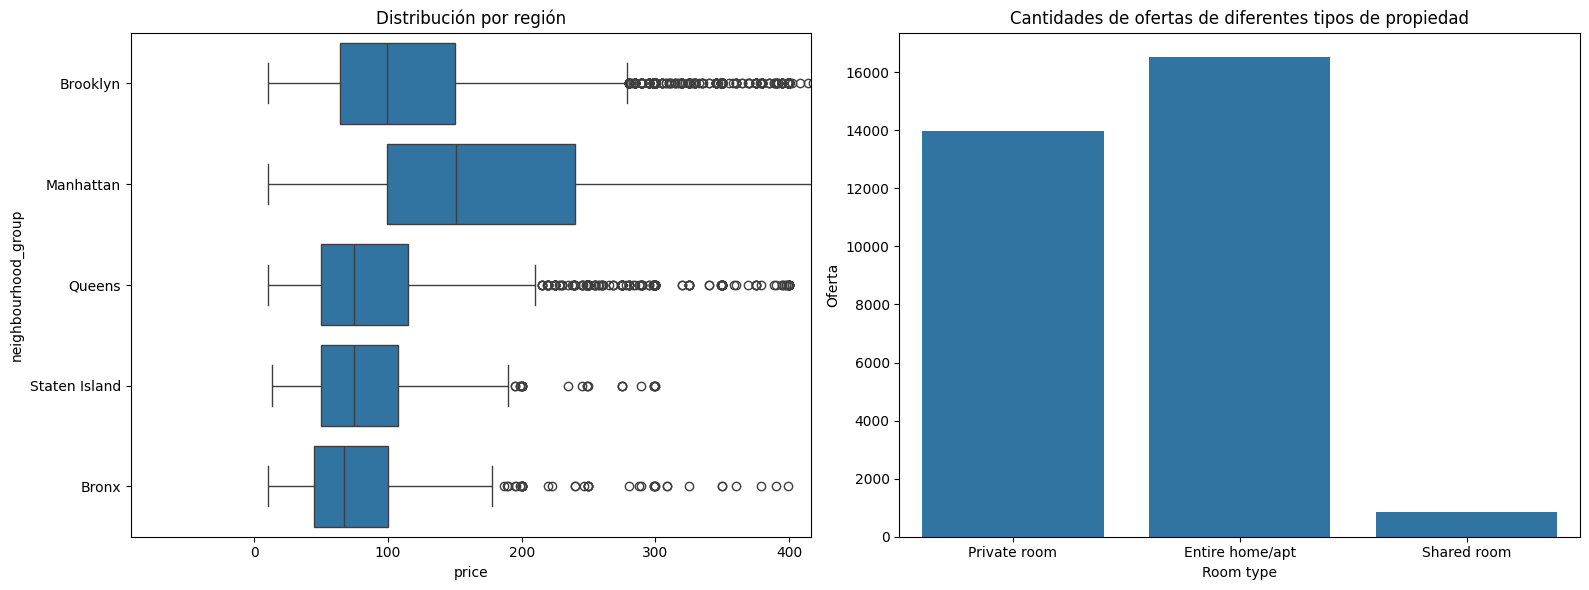

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios':[1, 1]})
mean_price = df['price'].mean()
std_price = df['price'].std()
sns.boxplot(x='price', y='neighbourhood_group', data=df, ax=axes[0])
axes[0].set_xlim(mean_price - std_price, mean_price + std_price)
axes[0].set_title('Distribución por región')
sns.countplot(data=df, x='room_type', ax=axes[1])
axes[1].set_xlabel('Room type')
axes[1].set_ylabel('Oferta')
axes[1].set_title('Cantidades de ofertas de diferentes tipos de propiedad')
plt.tight_layout()
plt.show()

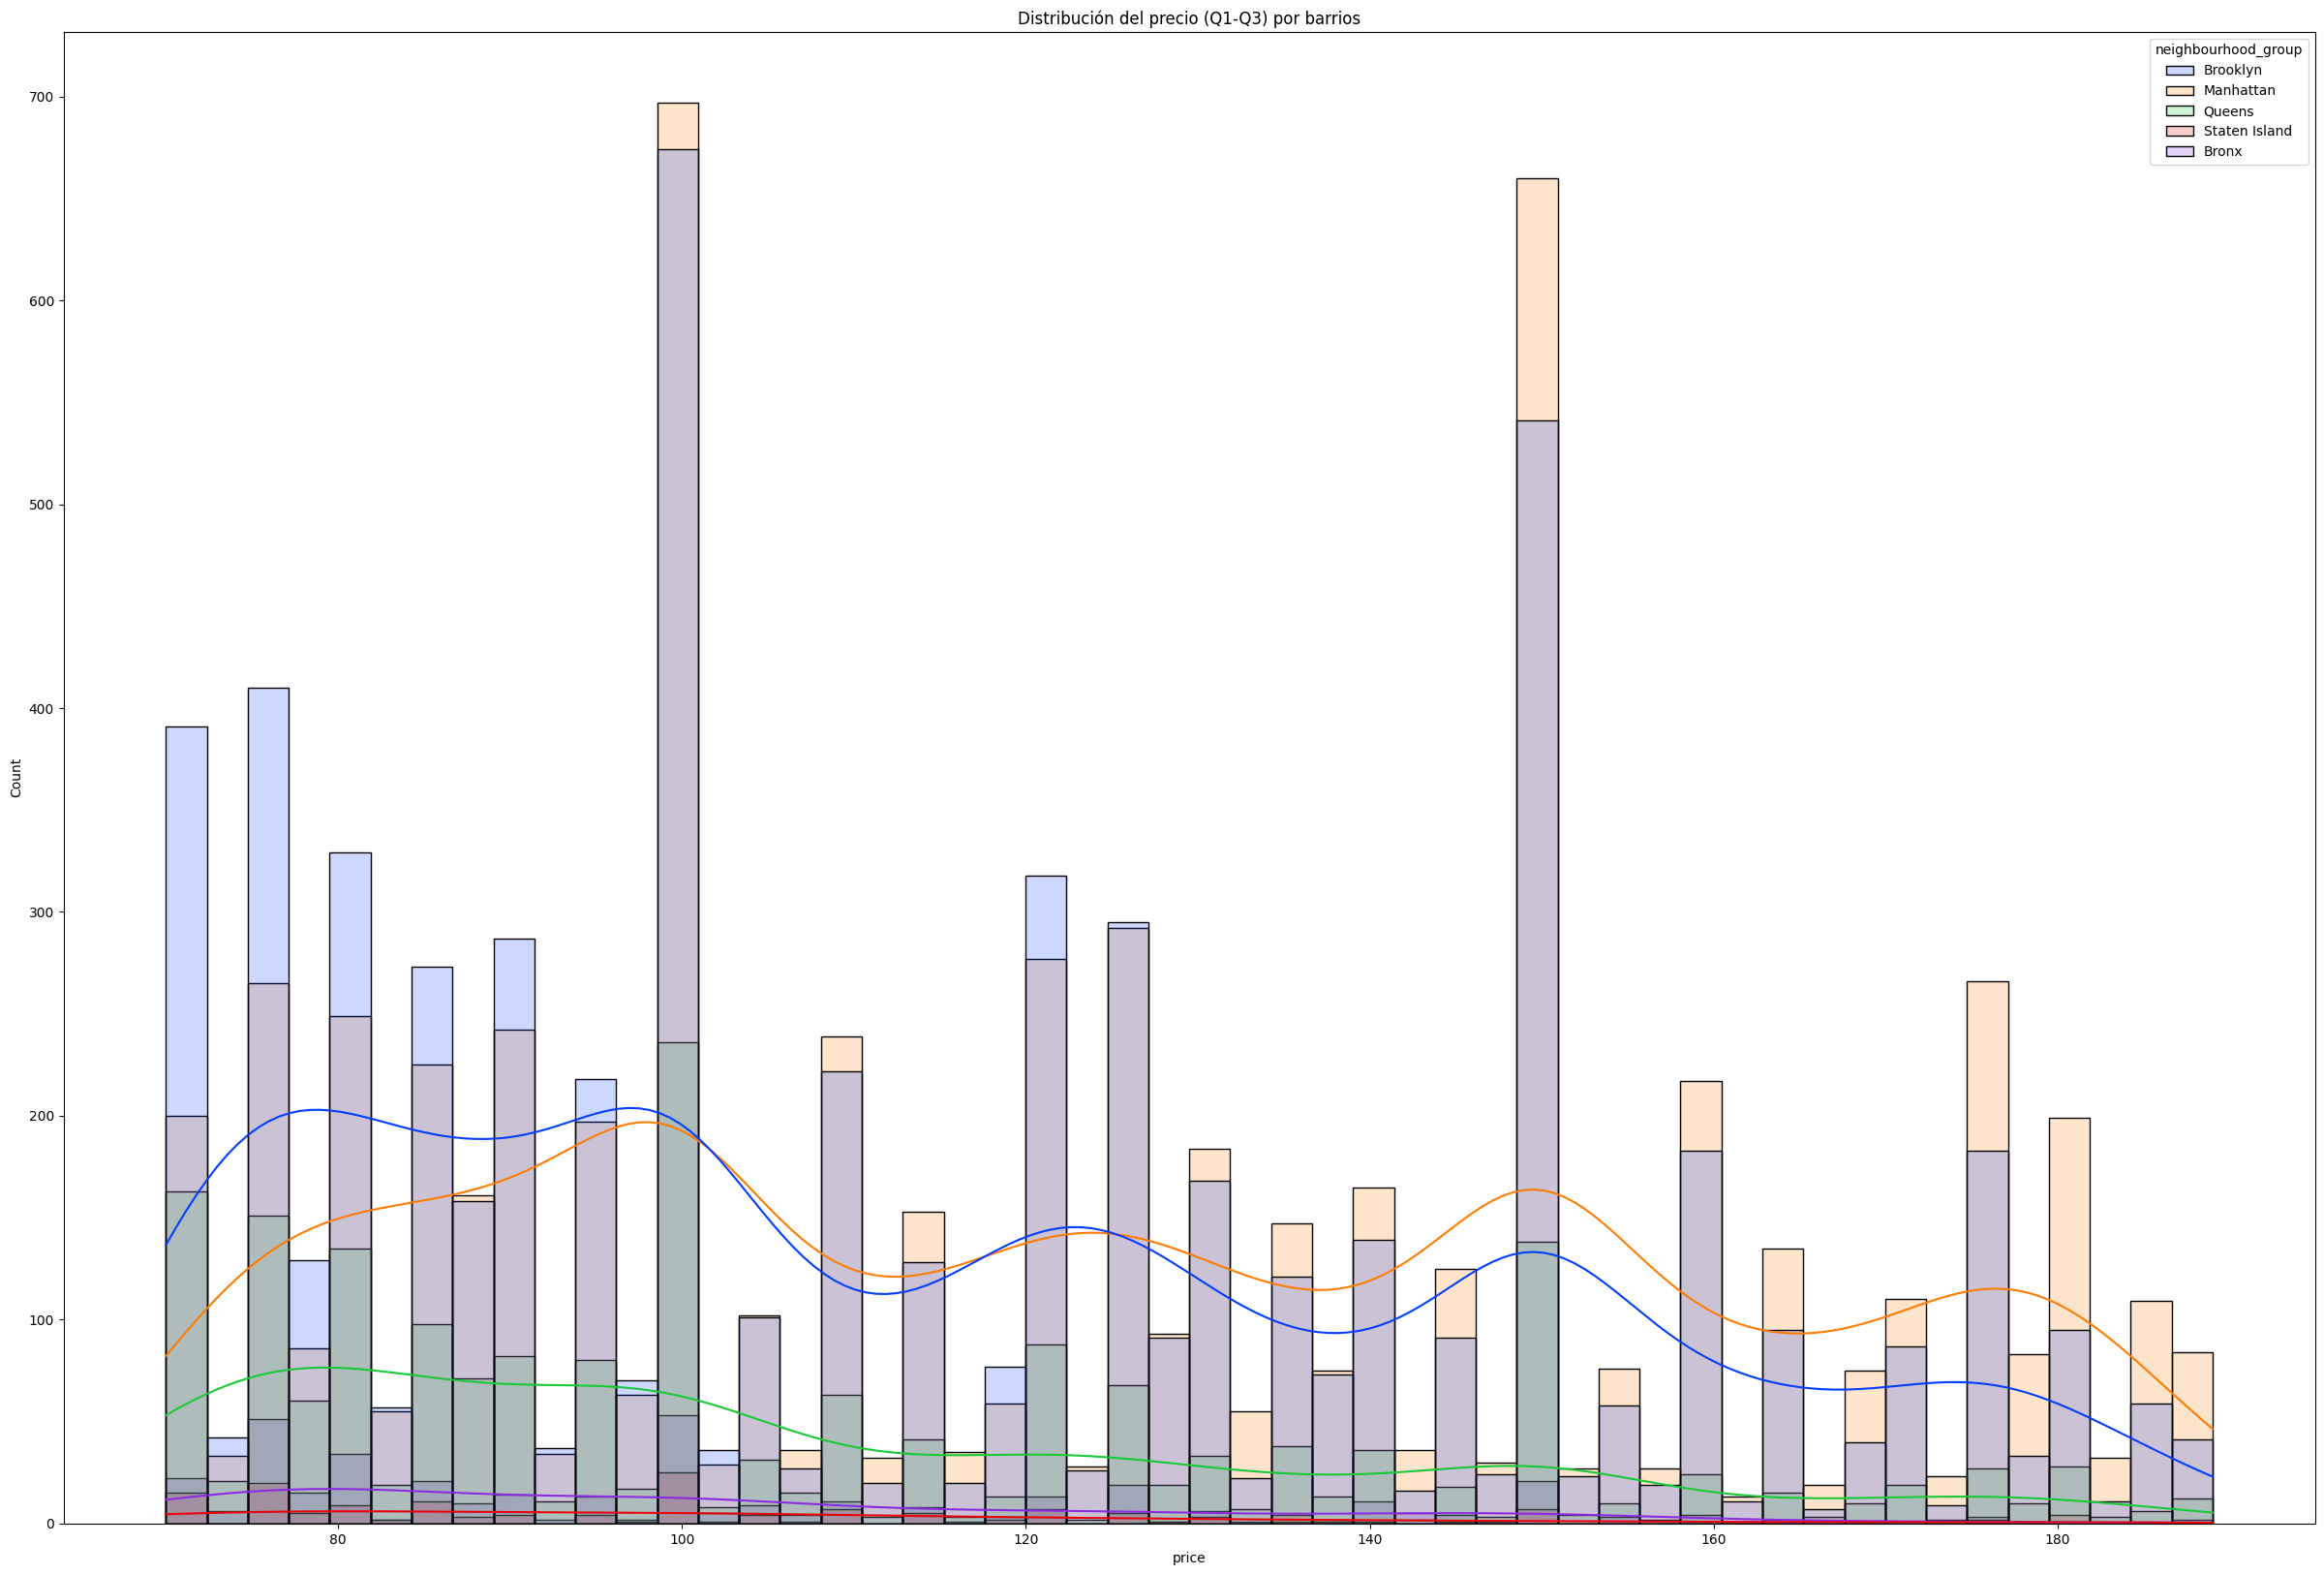

In [16]:
plt.figure(figsize=(30,20))
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
df_filtro = df[(df['price'] >= q1) & (df['price'] <= q3)]
sns.histplot(df_filtro, x='price', bins=50, hue='neighbourhood_group',palette='bright',alpha=0.2, kde=True)
plt.title('Distribución del precio (Q1-Q3) por barrios')
plt.show()

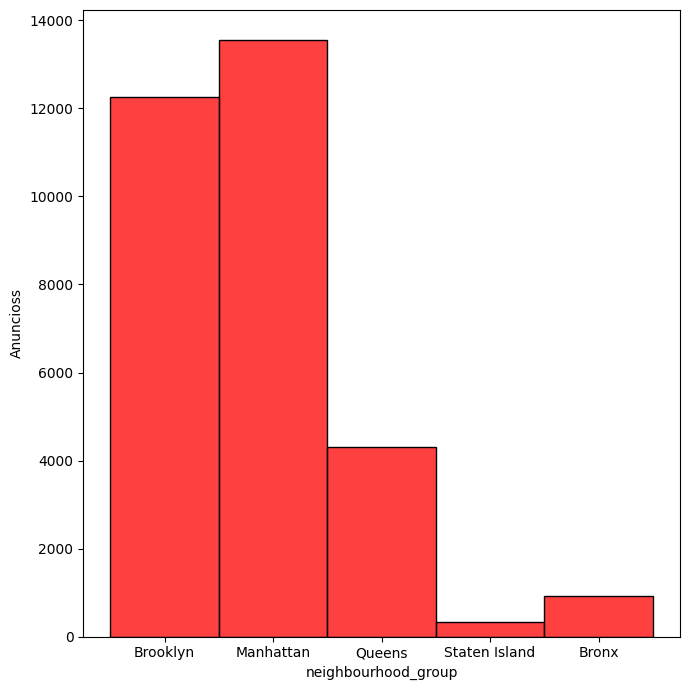

In [17]:
fig, axis = plt.subplots(figsize=(7, 7))
sns.histplot(ax=axis, data=df, x='neighbourhood_group', color='red').set(ylabel='Anuncioss')
plt.tight_layout()
plt.show()

/tmp/ipykernel_928/2617880588.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price',y='room_type',data=df_filtro,ax=axes[0],palette='pastel')


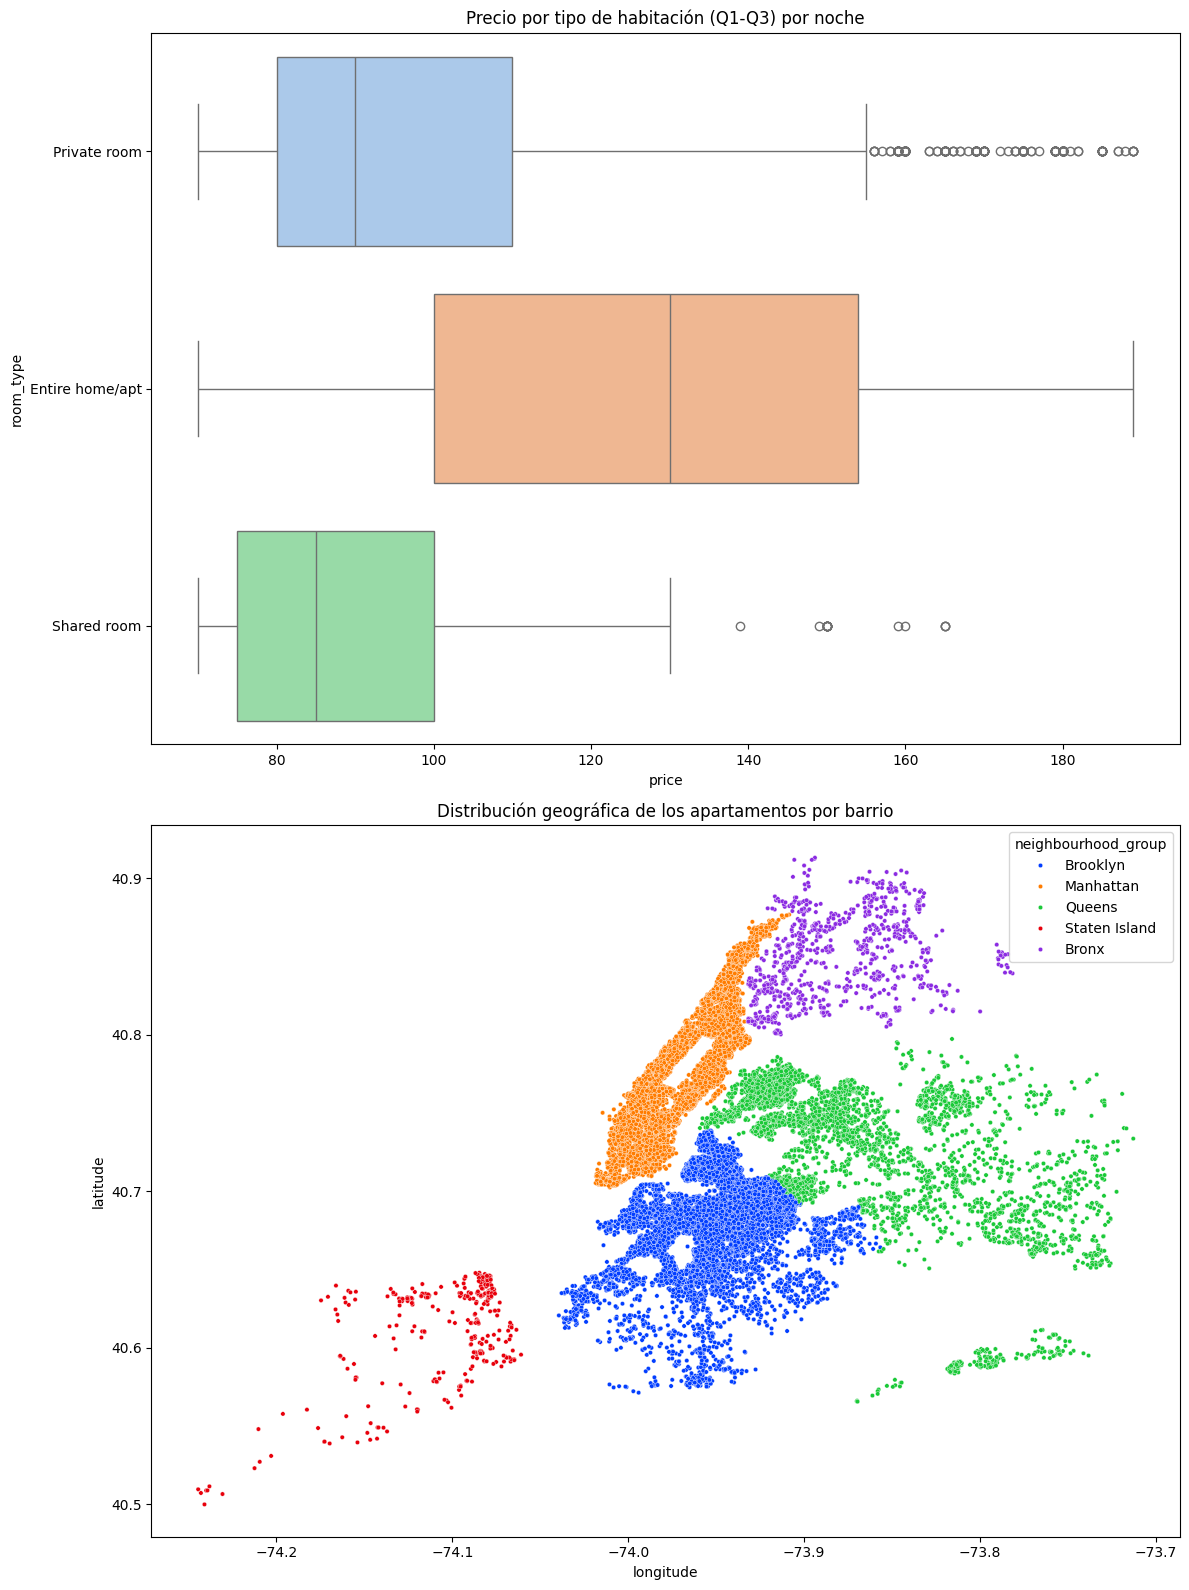

In [18]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
df_filtro = df[(df['price'] >= q1) & (df['price'] <= q3)]
fig, axes = plt.subplots(2, 1, figsize=(12, 16))
sns.boxplot(x='price',y='room_type',data=df_filtro,ax=axes[0],palette='pastel')
axes[0].set_title('Precio por tipo de habitación (Q1-Q3) por noche')
sns.scatterplot(data=df,x='longitude',y='latitude',hue='neighbourhood_group',s=10,ax=axes[1],palette='bright')
axes[1].set_title('Distribución geográfica de los apartamentos por barrio')
plt.tight_layout()
plt.show()

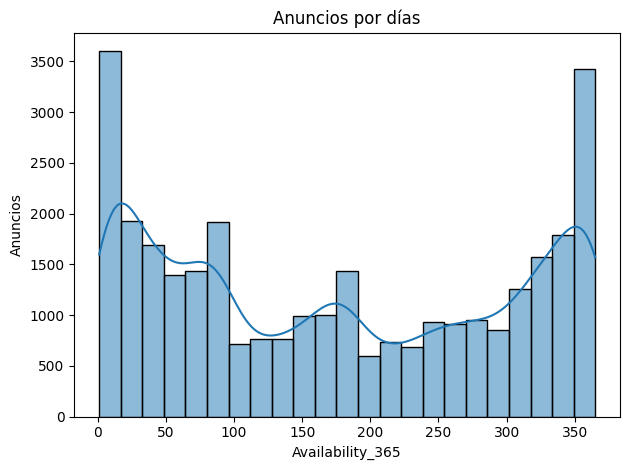

In [19]:
sns.histplot(data=df, x='availability_365', kde=True).set(title='Histograma', xlabel='Availability_365', ylabel='Anuncios')
plt.title('Anuncios por días')
plt.tight_layout()
plt.show()

**Obervaciones parciales**

> - La mayores cantidades de anuncios se ofrecen entre apartamentos completos o privados y habitaciones privadas. Hay muy pocos anuncios de habitaciones compartidas en comparacion.
> - La mayor concentración de anuncios se en la localidad de Manhattan, seguido por Brooklyn y luego por Queens en menor cantidad. 
> - Vemos que no hay grandes diferencias de precios entre habitacion compartidas y habitacion privada, pero si a la hora de alquilar un departamento entero.
> - El precio tampoco varia entre las localidades de Queens, State Island y Bronx, pero si en relacion a las dos restantes.
> - En este ultimo histograma se ve que la mayor cantidad de anuncios se da entre 0 a 5 dias o en 365 dias.

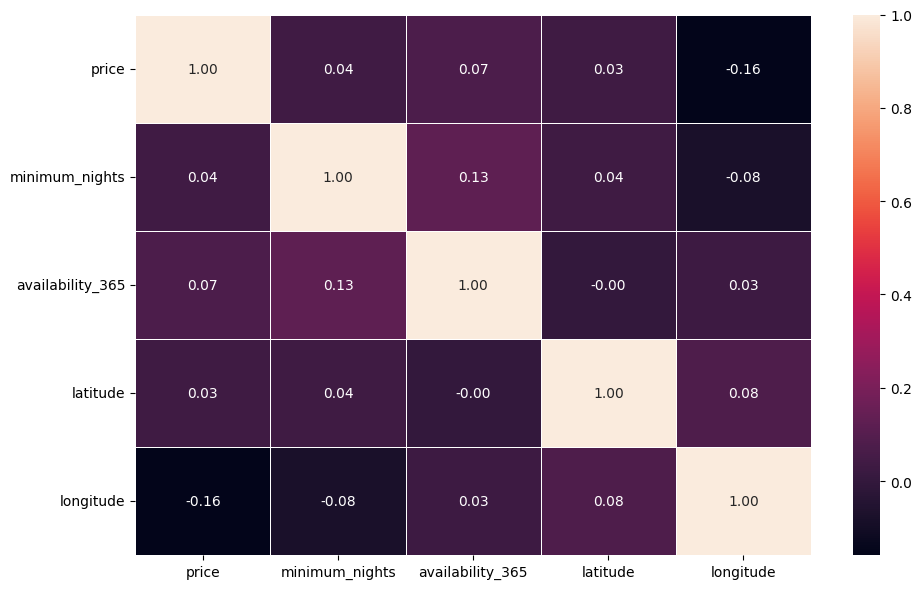

In [20]:
corr = df[['price', 'minimum_nights','availability_365','latitude','longitude']].corr()
fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

In [21]:
df['room_type_facto'] = pd.factorize(df['room_type'])[0]
df[['room_type', 'room_type_facto']].head(5)

,room_type,room_type_facto
0,Private room,0
1,Entire home/apt,1
2,Private room,0
3,Entire home/apt,1
5,Entire home/apt,1


In [22]:
df['neighbourhood_group_facto'] = pd.factorize(df['neighbourhood_group'])[0]
df[['neighbourhood_group', 'neighbourhood_group_facto']].head(5)

,neighbourhood_group,neighbourhood_group_facto
0,Brooklyn,0
1,Manhattan,1
2,Manhattan,1
3,Brooklyn,0
5,Manhattan,1


In [23]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
latitude,31354.0,40.73,0.06,40.50,40.69,40.72,40.76,40.91
longitude,31354.0,-73.95,0.05,-74.24,-73.98,-73.95,-73.93,-73.71
price,31354.0,162.09,254.44,10.00,70.00,112.00,189.00,10000.00
minimum_nights,31354.0,8.34,23.84,1.00,2.00,3.00,5.00,1250.00
availability_365,31354.0,175.83,126.20,1.00,55.00,168.00,305.00,365.00
room_type_facto,31354.0,0.58,0.55,0.00,0.00,1.00,1.00,2.00
neighbourhood_group_facto,31354.0,0.85,0.90,0.00,0.00,1.00,1.00,4.00


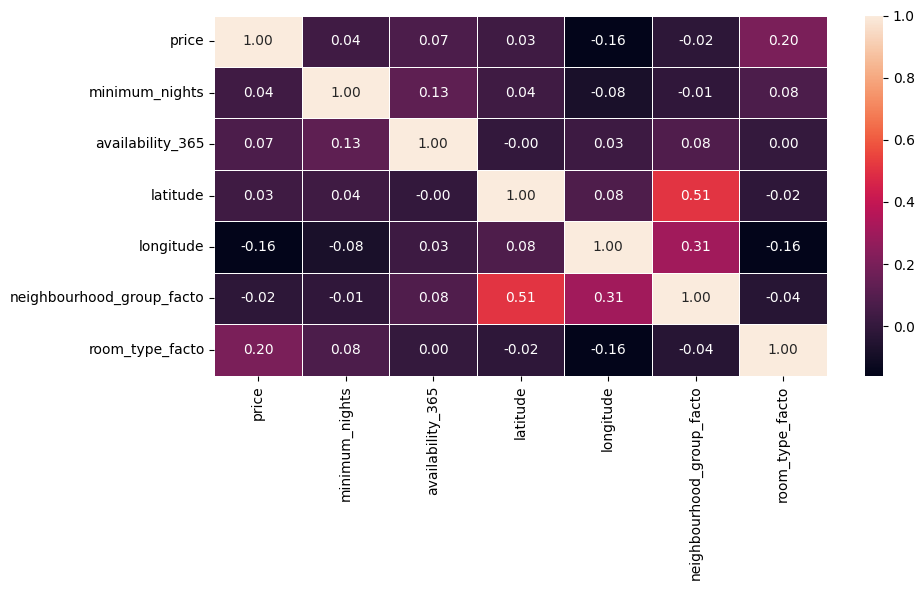

In [24]:
corr = df[['price', 'minimum_nights','availability_365','latitude','longitude','neighbourhood_group_facto','room_type_facto']].corr()
fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

El gráfico muestra que el tipo de habitación sí afecta algo al precio, pero no mucho. Las variables operativas (minimum_nights, availability) no explican casi nada del precio.

In [25]:
df.shape

(31354, 9)

In [26]:
df.isnull().sum() / df.shape[0]

neighbourhood_group          0.0
latitude                     0.0
longitude                    0.0
room_type                    0.0
price                        0.0
minimum_nights               0.0
availability_365             0.0
room_type_facto              0.0
neighbourhood_group_facto    0.0
dtype: float64

**- Paso 7: SPLIT**

In [27]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=18)

In [28]:
X_train.columns

Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type',
       'minimum_nights', 'availability_365', 'room_type_facto',
       'neighbourhood_group_facto'],
      dtype='object')

In [29]:
X_train

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,availability_365,room_type_facto,neighbourhood_group_facto
47746,Manhattan,40.72573,-73.98414,Entire home/apt,3,291,1,1
38977,Brooklyn,40.69058,-73.91402,Entire home/apt,2,122,1,0
34930,Queens,40.75375,-73.90037,Private room,2,125,0,2
13453,Queens,40.68960,-73.80446,Entire home/apt,1,324,1,2
48627,Bronx,40.81576,-73.84653,Entire home/apt,3,169,1,4
...,...,...,...,...,...,...,...,...
2251,Brooklyn,40.71273,-73.94399,Entire home/apt,30,26,1,0
3976,Brooklyn,40.68075,-74.00961,Entire home/apt,2,264,1,0
42895,Queens,40.76695,-73.81638,Entire home/apt,7,174,1,2
46447,Manhattan,40.76273,-73.99028,Entire home/apt,2,55,1,1


In [30]:
y_test.shape

(6271,)

In [31]:
y_train

47746    180
38977    125
34930     57
13453    179
48627     98
        ... 
2251      83
3976     134
42895    250
46447    255
45366     80
Name: price, Length: 25083, dtype: int64

In [32]:
y_train.shape

(25083,)

**- Paso 8: SCALING - ENCODING**


In [33]:
min_max_scaler = MinMaxScaler()

num_variables = ['latitude', 'longitude', 'neighbourhood_group_facto','availability_365','room_type_facto', 'price']
min_max_features = min_max_scaler.fit_transform(df[num_variables])

df_min_max = pd.DataFrame(min_max_features,index=df.index,columns=num_variables)
df_min_max.head()

,latitude,longitude,neighbourhood_group_facto,availability_365,room_type_facto,price
0,0.357393,0.511921,0.00,1.000000,0.0,0.013914
1,0.614199,0.490469,0.25,0.972527,0.5,0.021522
2,0.748252,0.569257,0.25,1.000000,0.0,0.014014
3,0.448496,0.535649,0.00,0.530220,0.5,0.007908
5,0.599802,0.506972,0.25,0.351648,0.5,0.019019


**ENCODING**


In [34]:
#COPIAS
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
label_encoder_room_type_facto = LabelEncoder()
label_encoder_room_type_facto.fit(X_train['room_type_facto'])
X_train_copy['room_type_fact_le'] = label_encoder_room_type_facto.transform(X_train['room_type_facto'])
X_test_copy['room_type_fact_le'] = label_encoder_room_type_facto.transform(X_test['room_type_facto'])
X_train_copy.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,availability_365,room_type_facto,neighbourhood_group_facto,room_type_fact_le
47746,Manhattan,40.72573,-73.98414,Entire home/apt,3,291,1,1,1
38977,Brooklyn,40.69058,-73.91402,Entire home/apt,2,122,1,0,1
34930,Queens,40.75375,-73.90037,Private room,2,125,0,2,0
13453,Queens,40.68960,-73.80446,Entire home/apt,1,324,1,2,1
48627,Bronx,40.81576,-73.84653,Entire home/apt,3,169,1,4,1


In [35]:
#COPIAS
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
label_encoder_neighbourhood_group_facto = LabelEncoder()
label_encoder_neighbourhood_group_facto.fit(X_train['neighbourhood_group_facto'])
X_train_copy['neighbourhood_group_facto_le'] = label_encoder_neighbourhood_group_facto.transform(X_train['neighbourhood_group_facto'])
X_test_copy['neighbourhood_group_facto_le'] = label_encoder_neighbourhood_group_facto.transform(X_test['neighbourhood_group_facto'])
X_train_copy.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,availability_365,room_type_facto,neighbourhood_group_facto,neighbourhood_group_facto_le
47746,Manhattan,40.72573,-73.98414,Entire home/apt,3,291,1,1,1
38977,Brooklyn,40.69058,-73.91402,Entire home/apt,2,122,1,0,0
34930,Queens,40.75375,-73.90037,Private room,2,125,0,2,2
13453,Queens,40.68960,-73.80446,Entire home/apt,1,324,1,2,2
48627,Bronx,40.81576,-73.84653,Entire home/apt,3,169,1,4,4


In [36]:
cat_variables = ['room_type_facto','neighbourhood_group_facto']
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoder.fit(X_train[cat_variables])
X_train_cat_ohe = onehot_encoder.transform(X_train[cat_variables])
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe,index=X_train.index,columns=onehot_encoder.get_feature_names_out(cat_variables))
X_test_cat_ohe = onehot_encoder.transform(X_test[cat_variables])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe,index=X_test.index,columns=onehot_encoder.get_feature_names_out(cat_variables))
X_train_cat_ohe.head()

,room_type_facto_0,room_type_facto_1,room_type_facto_2,neighbourhood_group_facto_0,neighbourhood_group_facto_1,neighbourhood_group_facto_2,neighbourhood_group_facto_3,neighbourhood_group_facto_4
47746,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
38977,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
34930,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13453,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
48627,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


**-Paso 9: Selección de características**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_min_max.drop('price', axis=1),df_min_max['price'],test_size=0.2,random_state=42)
selection_model = SelectKBest(f_classif, k=5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
selection_model_transform_train = selection_model.transform(X_train)
selection_model_transform_test = selection_model.transform(X_test)
X_train_sel = pd.DataFrame(selection_model_transform_train, columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model_transform_test, columns=X_test.columns.values[ix])
X_train_sel.head()

,latitude,longitude,neighbourhood_group_facto,availability_365,room_type_facto
0,0.426791,0.495004,0.00,0.689560,0.0
1,0.543156,0.468679,0.25,0.222527,0.5
2,0.607133,0.727622,0.50,0.159341,0.0
3,0.522661,0.473985,0.25,0.870879,0.0
4,0.446972,0.526523,0.00,0.362637,0.0
